In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the iris dataset
iris = load_iris()

# Convert to a pandas DataFrame for easy manipulation
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X = iris_df.iloc[:,[1,2,3,4]].values
X

array([[3.5, 1.4, 0.2, 0. ],
       [3. , 1.4, 0.2, 0. ],
       [3.2, 1.3, 0.2, 0. ],
       [3.1, 1.5, 0.2, 0. ],
       [3.6, 1.4, 0.2, 0. ],
       [3.9, 1.7, 0.4, 0. ],
       [3.4, 1.4, 0.3, 0. ],
       [3.4, 1.5, 0.2, 0. ],
       [2.9, 1.4, 0.2, 0. ],
       [3.1, 1.5, 0.1, 0. ],
       [3.7, 1.5, 0.2, 0. ],
       [3.4, 1.6, 0.2, 0. ],
       [3. , 1.4, 0.1, 0. ],
       [3. , 1.1, 0.1, 0. ],
       [4. , 1.2, 0.2, 0. ],
       [4.4, 1.5, 0.4, 0. ],
       [3.9, 1.3, 0.4, 0. ],
       [3.5, 1.4, 0.3, 0. ],
       [3.8, 1.7, 0.3, 0. ],
       [3.8, 1.5, 0.3, 0. ],
       [3.4, 1.7, 0.2, 0. ],
       [3.7, 1.5, 0.4, 0. ],
       [3.6, 1. , 0.2, 0. ],
       [3.3, 1.7, 0.5, 0. ],
       [3.4, 1.9, 0.2, 0. ],
       [3. , 1.6, 0.2, 0. ],
       [3.4, 1.6, 0.4, 0. ],
       [3.5, 1.5, 0.2, 0. ],
       [3.4, 1.4, 0.2, 0. ],
       [3.2, 1.6, 0.2, 0. ],
       [3.1, 1.6, 0.2, 0. ],
       [3.4, 1.5, 0.4, 0. ],
       [4.1, 1.5, 0.1, 0. ],
       [4.2, 1.4, 0.2, 0. ],
       [3.1, 1

### applying elbow method to find the optimal number of clusters

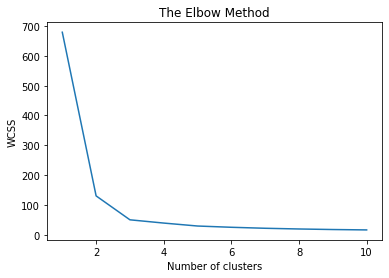

In [4]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
#applying kmeans to the dataset with value of k=3 in this case
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [6]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

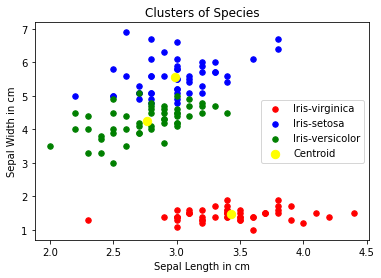

In [7]:
#visualising the clusters wrt sepals
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-virginica')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'yellow', label = 'Centroid')
plt.title('Clusters of Species')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend()
plt.show()

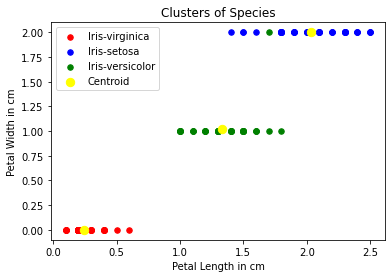

In [8]:
#visualising the clusters wrt petals
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 30, c = 'red', label = 'Iris-virginica')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 30, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 30, c = 'green', label = 'Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 70, c = 'yellow', label = 'Centroid')
plt.title('Clusters of Species')
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.legend()
plt.show()

### K-Means using 3 lusters directly since we know there are 3 clusters in total

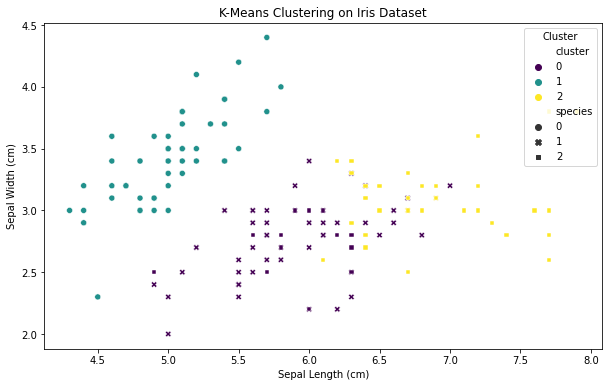

Centroids:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Cluster Labels:
 0    62
1    50
2    38
Name: cluster, dtype: int64


In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Perform K-means clustering with 3 clusters (since we know there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris.data)

# Map the actual species names to color the clusters correctly
iris_df['species'] = iris.target

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=iris_df['sepal length (cm)'], 
    y=iris_df['sepal width (cm)'], 
    hue=iris_df['cluster'], 
    palette='viridis',
    style=iris_df['species']
)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Cluster")
plt.show()

# Print out the centroids and cluster labels
print("Centroids:\n", kmeans.cluster_centers_)
print("\nCluster Labels:\n", iris_df['cluster'].value_counts())
